# k-means function

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def classify(means, x):
        meansd = np.broadcast_to(means, (x.shape[0], means.shape[0], means.shape[1]))
        xd = x[:,np.newaxis,:]
        dsq = np.sum(np.square(meansd - xd), axis=2)
        return np.argmin(dsq, axis=1)

def kmeans(X, k, visualize=False):
    # Infinity, so the first distance test doesnt fail
    old_means = np.array([float('inf') for i in range(k)])[np.newaxis].transpose()
    # k random points from the dataset are chosen to start with
    means = X[np.random.choice(X.shape[0], k, replace=False), :]
        
    while np.sum(np.abs(means - old_means)) > 0.1:
        old_means = np.copy(means)
        
        classes = classify(means, X)
        
        if visualize == True:
            plt.scatter(X[:,0], X[:,1], c=classes, cmap='Set3')
            plt.plot(means[:,0], means[:,1], 'k+')
            plt.axis('equal');
            plt.show()
        
        for i in range(means.shape[0]):
            means[i] = np.mean(X[np.where((classes == i))], axis=0)
            
    return classes

# XOR dataset

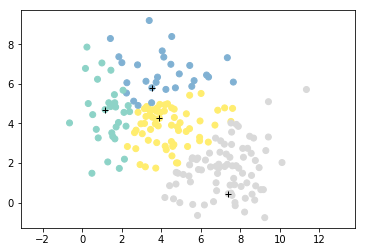

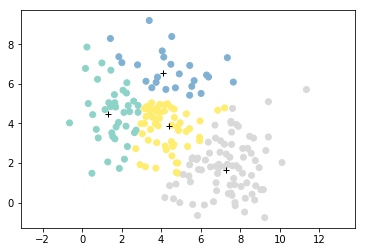

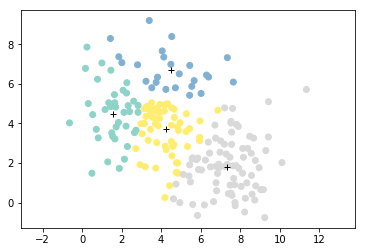

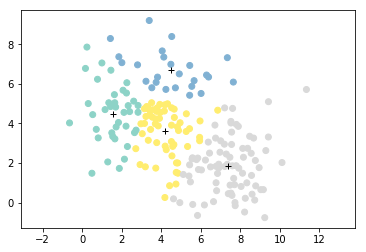

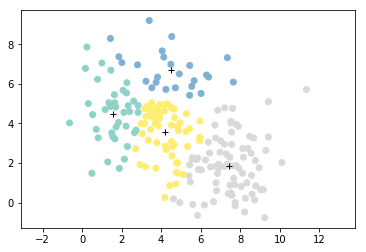

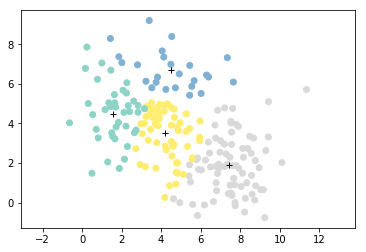

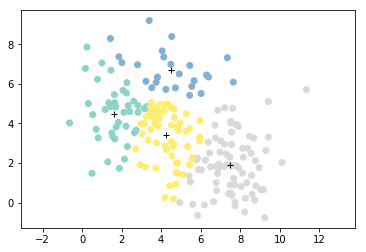

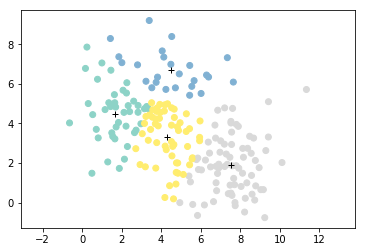

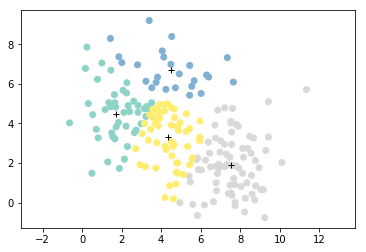

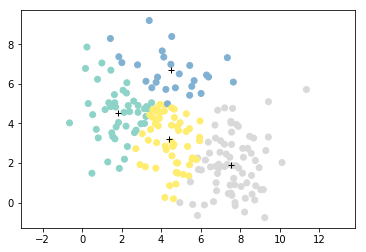

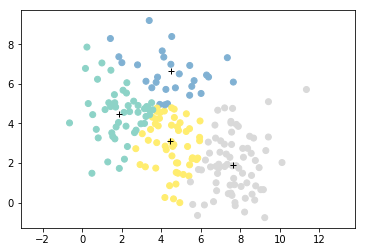

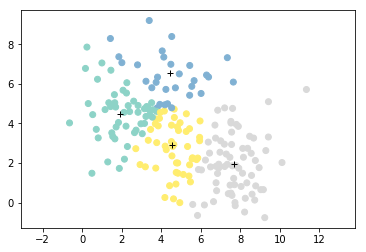

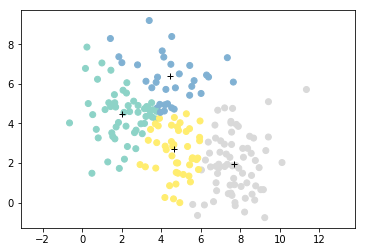

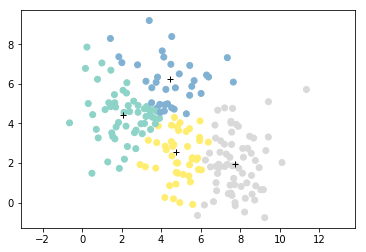

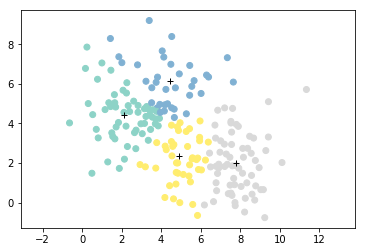

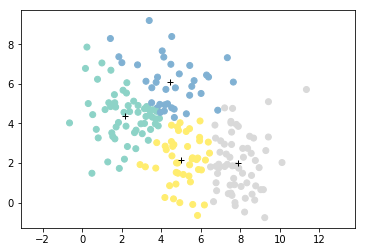

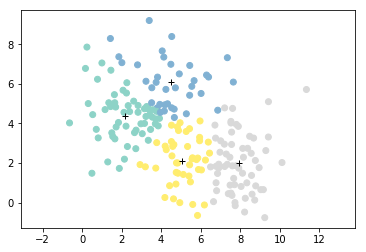

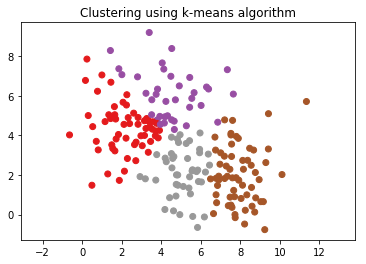

In [112]:
x1 = 1.5*np.random.randn(100)+3
y1 = 1.5*np.random.randn(100)+5
x2 = 1.5*np.random.randn(100)+7
y2 = 1.5*np.random.randn(100)+2
X = np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T

classes = kmeans(X, 4, visualize=True)

plt.scatter(X[:,0], X[:,1], c=classes, cmap='Set1')
plt.title('Clustering using k-means algorithm')
plt.axis('equal');
plt.show()